In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv(r"E:\PYTHON\Titanic dataset\titanic-1.csv", encoding="unicode_escape")

In [9]:
df.shape

(891, 12)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
pd.isnull(df).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df.drop(['Cabin'],axis=1,inplace=True)

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
df.dropna(inplace=True)

In [62]:
df.shape

(712, 11)

# Survival Rate: Calculate and visualize the overall survival rate.

<Axes: xlabel='Survived', ylabel='count'>

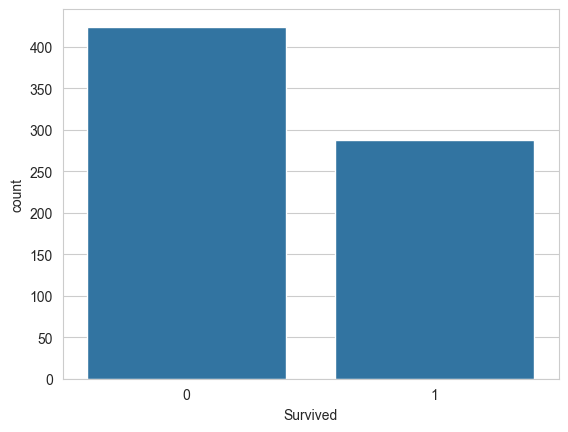

In [32]:
sns.countplot(x="Survived", data=df)

*From above graphs we can see that most of the Survived rate*

# Passenger Class Analysis: Analyze the survival rates by passenger class.

<Axes: xlabel='Pclass', ylabel='Survived'>

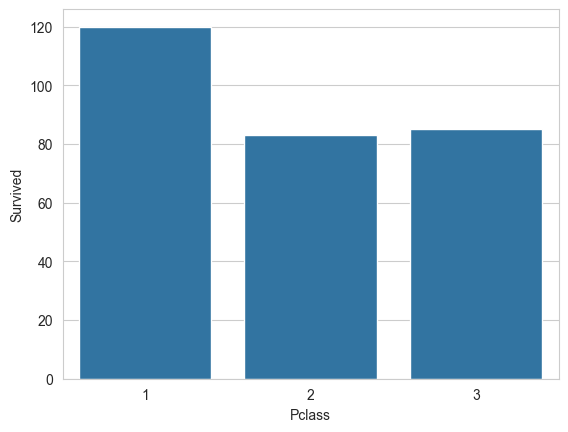

In [59]:
passenger=df.groupby(['Pclass'], as_index=False)['Survived'].sum().sort_values(by='Survived', ascending=False)
passenger
sns.barplot(x="Pclass", y="Survived", data=passenger)

*From above graphs we can see that most of the survival rates of pclass is 1 than second survival rates of pclass is 3 and than 2*

# Gender Analysis: Analyze the survival rates by gender.

<Axes: xlabel='Sex', ylabel='Survived'>

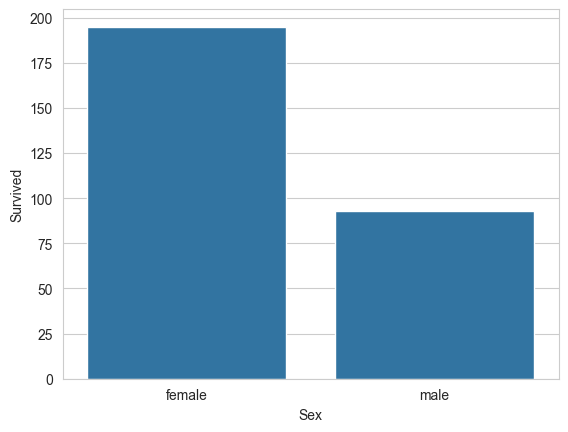

In [69]:
Gender=df.groupby(['Sex'], as_index=False)['Survived'].sum().sort_values(by='Survived', ascending=False)
Gender
sns.barplot(x="Sex", y="Survived", data=Gender)

*From above graphs we can see that most of the survived rate by gender of females are greater than male*

# Age Analysis: Analyze the survival rates by age groups.

<Axes: xlabel='AgeGroup'>

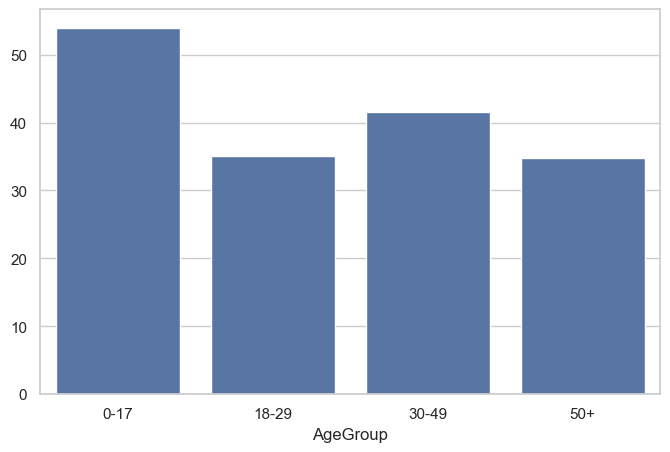

In [96]:
age=df.groupby(['Age'], as_index=False)['Survived'].sum().sort_values(by='Survived', ascending=False)
age
bins = [0, 18, 30, 50, 80]
labels = ['0-17', '18-29', '30-49', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8,5))
sns.barplot(x=survival_rates.index, y=survival_rates.values)

*From above graphs we can see that most of the survivals are of age group between 0-17 yrs*

# Fare Analysis: Analyze the fare distribution and its impact on survival.

<Axes: xlabel='Survived', ylabel='Fare'>

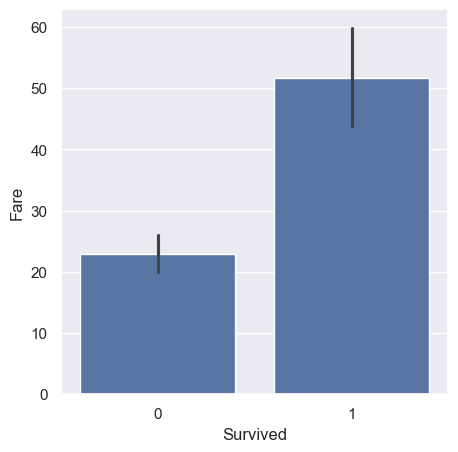

In [110]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Survived', y='Fare', data=df)


# Age Distribution: Visualize the distribution of passenger ages.

<Axes: xlabel='Age', ylabel='Count'>

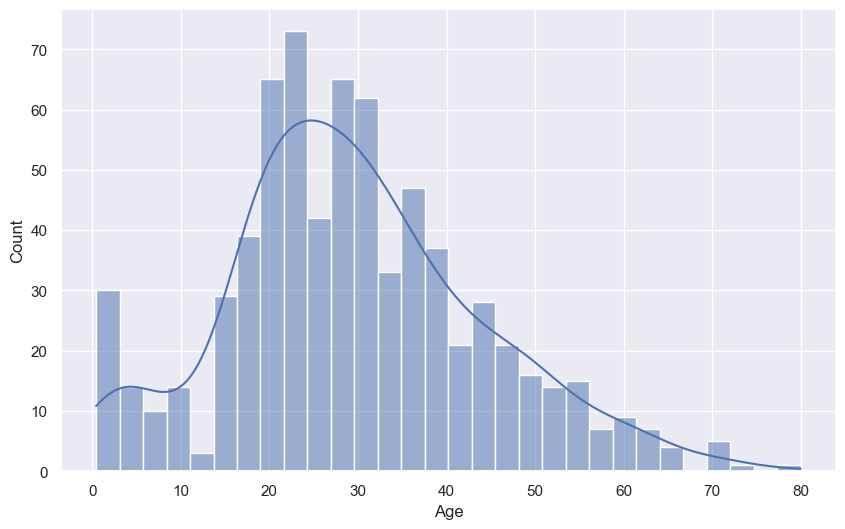

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)


*From above graphs we can see that most of the passangers are of age group between 20-40 yrs*

# Fare Distribution: Visualize the distribution of fares.

<Axes: xlabel='Fare', ylabel='Count'>

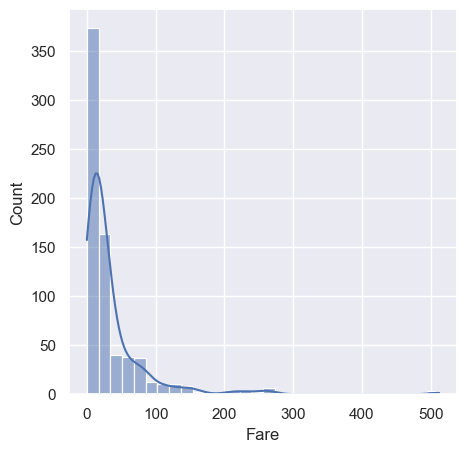

In [124]:
sns.histplot(df['Fare'], bins=30, kde=True)

# Correlation Analysis: Create a heatmap to visualize the correlation between features.

In [131]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [155]:
numeric_data = df.groupby("Survived").agg({"Fare": "mean", "Pclass" :"mean",	"Age": "mean"})

numeric_data

,Fare,Pclass,Age
Survived,,,
0,22.965456,2.485849,30.626179
1,51.647672,1.878472,28.193299


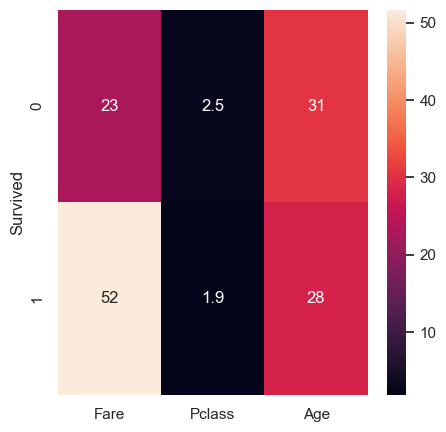

In [156]:
sns.heatmap(numeric_data, annot=True)# here annot is define the numbers 
plt.show()

In [158]:
 df['Survived']


0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

# Conclusion

*The majority of passengers were aged 20-40 years, highest Survival by Class is (pclass 1) passengers had the highest survival rates, (Pclass 3) passengers had lower survival rates compared to the first class but higher than second class, (Pclass 2) passengers had the lowest survival rates*

*These findings highlight that younger passengers and those in higher classes had better survival outcomes on the Titanic.*